In [1]:
from spectral_cube import SpectralCube
#from pvextractor import extract_pv_slice, Path
#import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
#from matplotlib.colors import LogNorm
#from astropy.visualization.stretch import SinhStretch
#from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from reproject import reproject_exact
from astropy.io import fits
from reproject.mosaicking import find_optimal_celestial_wcs


In [2]:
# SpectralCube.read().with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits').with_spectral_unit(u.GHz, velocity_convention='radio')
cube1 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/ch3oh/g5a.CH3OH.spw21.fits')

In [3]:
# SpectralCube.read('',format='casa_image')
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.12CO.spw17.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.CH3OH.spw21.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw23.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw25.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.SiO.spw27.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.13CO.spw29.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube2 = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.C18O.spw31.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
cube2 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/ch3oh/g5b.CH3OH.spw21.fits')

In [4]:

a_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits' 
               ]

b_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits'
               ]


In [5]:
'''
a_reprojectednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits' 
               ]

b_reprojectednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.C18O.spw31.fits'
               ]
'''

SyntaxError: EOF while scanning triple-quoted string literal (358722944.py, line 20)

In [ ]:
'''
a_cube17 = SpectralCube.read(a_reprojectednames[0])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube21 = SpectralCube.read(a_reprojectednames[2])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube23 = SpectralCube.read(a_reprojectednames[3])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube25 = SpectralCube.read(a_reprojectednames[4])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube27 = SpectralCube.read(a_reprojectednames[5])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube29 = SpectralCube.read(a_reprojectednames[6])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube31 = SpectralCube.read(a_reprojectednames[7])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)

In [ ]:
'''
b_cube17 = SpectralCube.read(b_reprojectednames[0])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube21 = SpectralCube.read(b_reprojectednames[2])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube23 = SpectralCube.read(b_reprojectednames[3])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube25 = SpectralCube.read(b_reprojectednames[4])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube27 = SpectralCube.read(b_reprojectednames[5])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube29 = SpectralCube.read(b_reprojectednames[6])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube31 = SpectralCube.read(b_reprojectednames[7])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)

In [ ]:
'''
combinednames = ['/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.12CO.spw17.fits',
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.Ha.spw19.fits', 
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.CH3OH.spw21.fits',
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw23.fits',
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw25.fits',
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.SiO.spw27.fits',
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.13CO.spw29.fits'
                '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.C18O.spw31.fits']

In [4]:
### Input Data
# SpectralCube.read().with_spectral_unit(u.GHz, velocity_convention='radio')
#cube1 = cube17a
#SpectralCube.read().with_spectral_unit(u.GHz, velocity_convention='radio')

#cube2 = cube17b
#SpectralCube.read().with_spectral_unit(u.GHz, velocity_convention='radio')


hdu1 = cube1.hdu
hdu2 = cube2.hdu

hduslice1 = cube1[2].hdu
hduslice2 = cube2[2].hdu

In [5]:
### Find the optimal WCS for a combined field. Create a header for the new combined image. 
wcs_opt, shape_opt = find_optimal_celestial_wcs([hduslice1,hduslice2], auto_rotate=False)
header = cube1.header.copy()
header['NAXIS'] = 3
header['NAXIS1'] = shape_opt[1]
header['NAXIS2'] = shape_opt[0]
header['NAXIS3'] = cube1.shape[0]
header.update(wcs_opt.to_header())
header['WCSAXES'] = 3
#print(cube1.shape, shape_opt)
#print(header)

### header = target header, reproject to this! 

In [6]:
wcs1 = wcs.WCS(hdu1)
shape2 = cube1.shape

wcs2 = wcs.WCS(hdu2)
shape1 = cube2.shape


wcs_optimal = wcs.WCS(header)
shape_optimal = [header['NAXIS{}'.format(i + 1)]
                for i in range(header['NAXIS'])][::-1]

In [7]:
cube1.allow_huge_operations=True

In [8]:
### Reproject the images to the final projection
# aka reproject cube1 and cube2 to optimal header 
cube_repr1 = cube1.reproject(header, block_size=[100,cube1.shape[1],cube1.shape[2]])#.minimal_subcube(spatial_only=True)

cube_repr1.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/pieces/g5a.CH3OH_masked.spw21.fits',overwrite=True)

#cube_repr1 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/pieces/g5a.H2CO_wide.spw25.fits').with_spectral_unit(u.GHz, velocity_convention='radio')


In [9]:
cube_repr2 = cube2.reproject(header, block_size=[100,cube2.shape[1],cube2.shape[2]])#.minimal_subcube(spatial_only=True)

cube_repr2.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/pieces/g5b.CH3OH_masked.spw21.fits',overwrite=True)

#cube_repr2 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/pieces/g5b.H2CO_wide.spw25.fits').with_spectral_unit(u.GHz, velocity_convention='radio')


In [10]:
#cube_repr1.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/pieces/g5a.repro.SiO_old.spw27.fits')
#cube_repr2.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/pieces/g5b.repro.SiO_old.spw27.fits')

In [11]:
final_array = np.zeros(shape_optimal)
final_foot = np.zeros(shape_optimal)

In [12]:
shape_optimal

[512, 278, 335]

In [13]:
cube_repr2.shape

(512, 278, 335)

In [14]:
print('done')

done


In [15]:
mask1 = cube_repr1.get_mask_array()
mask2 = cube_repr2.get_mask_array()

In [16]:
mask_comb = np.logical_or(mask1, mask2)
mask_xor = np.logical_xor(mask1, mask2)
mask_and = np.logical_and(mask1, mask2)

In [17]:
mask_opt = mask1.astype(float)+mask2.astype(float).astype(float)

INFO: Auto-setting vmin to -2.486e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.647e+00 [aplpy.core]


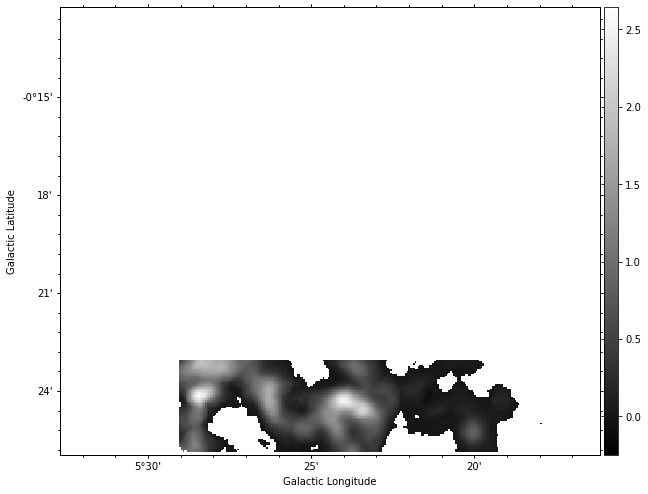

In [18]:
cube_repr1.moment0().quicklook()

INFO: Auto-setting vmin to -1.700e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.858e+00 [aplpy.core]


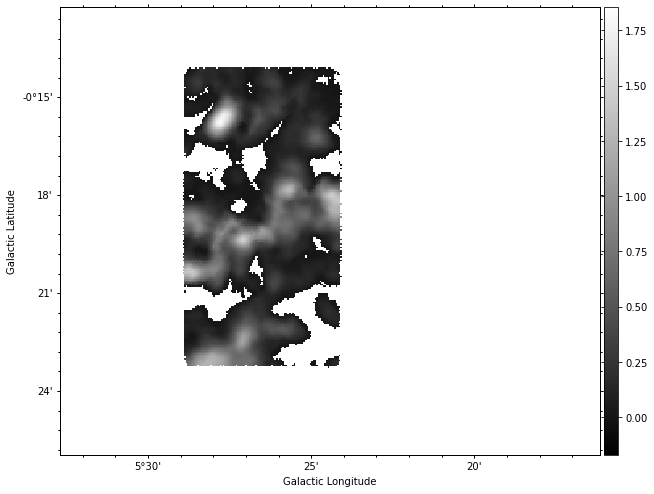

In [19]:
cube_repr2.moment0().quicklook()

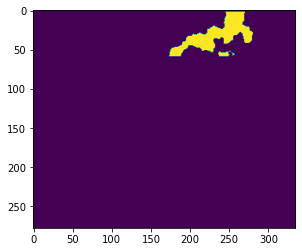

In [20]:
plt.imshow(mask_comb[5])

In [21]:
copy1 = cube_repr1.unmasked_copy()
copy2 = cube_repr2.unmasked_copy()

In [22]:
final_array.shape[0]

512

In [23]:
copy1.shape

(512, 278, 335)

In [24]:
copy2.shape

(512, 278, 335)

In [25]:
for s in range(final_array.shape[0]):
    slice1 = np.nan_to_num(copy1[s])
    slice2 = np.nan_to_num(copy2[s])
    #print(slice1.shape, slice2.shape, mask_opt[5].shape)
    final_array[s] = np.divide(np.add(slice1, slice2),mask_opt[5])

/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(func

In [28]:
cube_repr1.unit

Unit("K")

In [ ]:
#plt.imshow(mask_opt[0])

In [ ]:
#copy1 = np.nan_to_num(cube_repr1)
#copy2 = np.nan_to_num(cube_repr2)

In [ ]:
#a = [[1, 2, np.nan], [1,2,3], [np.nan, np.nan, np.nan]]
#b = [[1, 2, 3],[1,np.nan,3], [np.nan, np.nan, np.nan]]

In [ ]:
#stack = np.dstack((cube_repr1,cube_repr2))

In [ ]:
#final_array = np.nansum(stack,2)
#np.nansum(copy1, copy2)

In [ ]:
#final_array

In [ ]:
#final_array[final_array==0.] = np.nan
#mask_opt[mask_opt==0] = np.nan

In [ ]:
#final = np.divide(final_array, mask_opt)

In [ ]:
#plt.imshow(final[0])

In [ ]:
#final.moment0()

In [26]:
cube = SpectralCube(data=final_array*u.K, wcs=wcs.WCS(header))  


In [27]:
final_array[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


INFO: Auto-setting vmin to -1.573e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.075e+03 [aplpy.core]


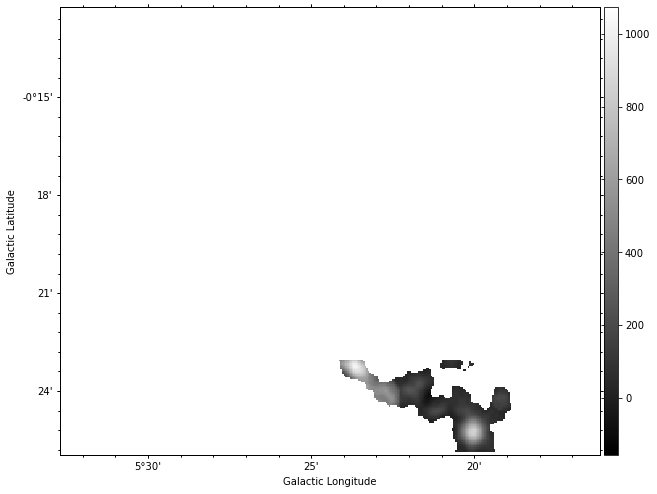

In [28]:
cube.moment0().quicklook()

In [ ]:
cube[50].quicklook()

In [ ]:
#cube.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw25.fits',overwrite=True)

In [ ]:
#g5a.repro.13CO.spw29.fits

In [ ]:
#cube29 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.13CO.spw29_test.fits').with_spectral_unit(u.GHz, velocity_convention='radio')

In [ ]:
cube29.moment0().quicklook()

In [ ]:
pwd